# Markowitz Portfolio Theory

## In this notebook, we are using only 2 assets

### Step 1: Import libraries and read data from yahoo finance
#### 1.1: Import libraries

In [16]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline


#### 1.2: Read historical data for 'Apple' and 'Walmart' using yahoo finance (from 2014-1-1)

In [17]:
assets = ['AAPL', 'WMT'] # define stocks to consider
pf_data = pd.DataFrame() #create a pandas dataframe object

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2014-1-1')['Adj Close'] #read data dynamically from yahoo finance

#### NOTE: Here, we are using Adjusted Close price for our work

### Step 2: Evaluating log returns, expected portfolio return, expected portfolio variance and expected portfolio volatility

#### Approach: We will make portfolios with AAPL and FB stocks having varying percentage/weights in different portfolios in order to evaluate which choice of weights provides optimal portfolio.

#### NOTE: We will do the process for one iteration then for simulate for large number of iterations

#### We will first analyze stock movement

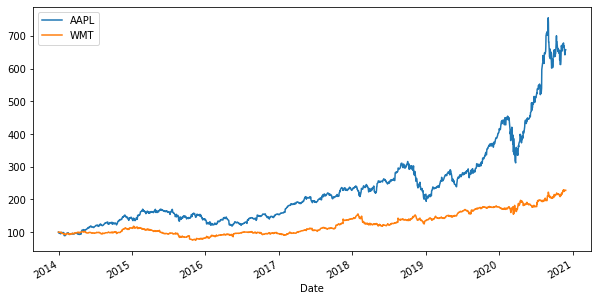

In [18]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5)) # Normalize the data to have a common starting point anlayze stocks movement

#### 2.1: Calculating Log Returns

$$
ln(\frac{P_t}{P_{t-1}})
$$

In [19]:
log_returns = np.log(pf_data / pf_data.shift(1)) # calculating log returns 

log_returns.head()

,AAPL,WMT
Date,,
2013-12-31,NaN,NaN
2014-01-02,-0.014164,0.002792
2014-01-03,-0.022211,-0.003301
2014-01-06,0.005438,-0.005610
2014-01-07,-0.007177,0.003064


#### 2.2: Assigning random weights for 2 stocks such that total weight of portfolio is equal to 1

In [20]:
num_assets = len(assets) # count of assets 

weights = np.random.random(num_assets)
weights /= np.sum(weights)
print("Weights:" )
weights

Weights:


array([0.47525171, 0.52474829])

#### 2.3: Expected Portfolio Return:

In [21]:
np.sum(weights * log_returns.mean()) * 250 # multiply by 250 for annual return as one year has 250 trading sessions

0.190703529259564

#### 2.4: Expected Portfolio Variance:

In [22]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)) # (w1s1 +w2s2)^2 in vectorized form

0.04066180562104863

#### 2.5: Expected Portfolio Volatility:
#### volatility is square root of variance

In [23]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.20164772654569807

***

### Step 3: We will simulate what we did above for large number of iterations

#### 3.1: Create two empty lists

In [24]:
pf_returns = [] # list for storing returns
pf_volatilities = [] # list for storing volatilities/standard deviation

#### 3.2: We will perform 1,000 iterations that will generate random weights, summing to 1, and will append the obtained values for the portfolio returns and the portfolio volatilities to pf_returns and pf_volatilities, respectively.

In [25]:
for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pf_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pf_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pf_returns, pf_volatilities

([0.12931037708412296,
  0.2283140304630081,
  0.11881826873667954,
  0.18454897438877343,
  0.19696451162511688,
  0.20678513924789002,
  0.1926180426565652,
  0.20148501088365828,
  0.18903929245920312,
  0.14921434780481466,
  0.24058127134043608,
  0.1778592450220478,
  0.15941168673524897,
  0.1881218082225368,
  0.2451524007115387,
  0.25057647388837473,
  0.20687470330356061,
  0.2051418223204967,
  0.20230522947663707,
  0.20019945281314902,
  0.257249609241158,
  0.21312535250805603,
  0.1956659452577038,
  0.2223608419458364,
  0.1197285606745588,
  0.16751163582734419,
  0.1626615614253136,
  0.2380702881036801,
  0.2676227375786859,
  0.14310729106219236,
  0.25570691785403,
  0.1517275515785612,
  0.18503619646853695,
  0.1526685632060115,
  0.13205425025176232,
  0.2076118581549505,
  0.1644561157129774,
  0.1410099820923384,
  0.2397084267884496,
  0.1711706561357701,
  0.2009680718460666,
  0.159324142017019,
  0.2109902331042567,
  0.17741786711302807,
  0.231617571344

#### 3.3: Now, transform the obtained lists into NumPy arrays

In [26]:
pf_returns = np.array(pf_returns)
pf_volatilities = np.array(pf_volatilities)

pf_returns, pf_volatilities

(array([0.12931038, 0.22831403, 0.11881827, 0.18454897, 0.19696451,
        0.20678514, 0.19261804, 0.20148501, 0.18903929, 0.14921435,
        0.24058127, 0.17785925, 0.15941169, 0.18812181, 0.2451524 ,
        0.25057647, 0.2068747 , 0.20514182, 0.20230523, 0.20019945,
        0.25724961, 0.21312535, 0.19566595, 0.22236084, 0.11972856,
        0.16751164, 0.16266156, 0.23807029, 0.26762274, 0.14310729,
        0.25570692, 0.15172755, 0.1850362 , 0.15266856, 0.13205425,
        0.20761186, 0.16445612, 0.14100998, 0.23970843, 0.17117066,
        0.20096807, 0.15932414, 0.21099023, 0.17741787, 0.23161757,
        0.1351851 , 0.19164809, 0.23052765, 0.16907512, 0.22053845,
        0.24368814, 0.11835726, 0.26713257, 0.23420029, 0.16645884,
        0.24485874, 0.14827343, 0.18988791, 0.2206197 , 0.19098834,
        0.19887614, 0.17522699, 0.21086411, 0.16901933, 0.1731979 ,
        0.18924846, 0.25899175, 0.13015745, 0.23817152, 0.20649992,
        0.169936  , 0.19741137, 0.1921384 , 0.21

#### 3.4: We will now create a dictionary, called portfolios, whose keys are the strings “Return” and “Volatility” and whose values are the NumPy arrays pf_returns and pf_volatilities. 

In [27]:
portfolios = pd.DataFrame({'Return': pf_returns, 'Volatility': pf_volatilities})

In [28]:
portfolios.head()

,Return,Volatility
0,0.129310,0.202124
1,0.228314,0.232587
2,0.118818,0.208883
3,0.184549,0.198604
4,0.196965,0.205387


In [29]:
portfolios.tail()

,Return,Volatility
995,0.196953,0.205380
996,0.225738,0.229887
997,0.118548,0.209080
998,0.191609,0.202149
999,0.188221,0.200343


### Step 4: Plotting the results

#### 4.1: Finally,  we will plot the data from the portfolios dictionary on a graph. Let the x-axis represent the volatility data from the portfolios dictionary and the y-axis, the data about rates of return.

Text(0, 0.5, 'Expected Return')

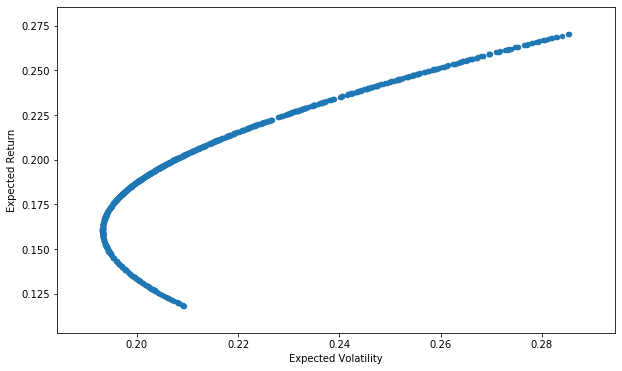

In [30]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10,6))
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

### The obtained curve is called 'Markowitz Efficient Frontier'. 

### This curve provides the risk-return relationship for our portfolio for various composition of weights. This can be useful in picking the optimal portfolio